
# Logistic Regression Project

In this project I have worked with a advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. I have tried to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Gender': The gender of the user (male/female)
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Importing the Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# the machine learning libraries have been imported further during the project when needed

## Get the Data
**Reading in the 'advertising data.csv' file into to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv('advertising data.csv')

**Checking the head of ad_data**

In [3]:
ad_data.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Gender,Area Income,Daily Internet Usage,Ad Topic Line,City,Country,Timestamp,Clicked on Ad
0,0,68.95,35,Female,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Tunisia,2016-03-27 00:53:11,0
1,1,80.23,31,Male,68441.85,193.77,Monitored national standardization,West Jodi,Nauru,2016-04-04 01:39:02,0
2,2,69.47,26,Female,59785.94,236.50,Organic bottom-line service-desk,Davidton,San Marino,2016-03-13 20:35:42,0
3,3,74.15,29,Male,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Italy,2016-01-10 02:31:19,0
4,4,68.37,35,Female,73889.99,225.58,Robust logistical utilization,South Manuel,Iceland,2016-06-03 03:36:18,0


There is a column 'Unnamed: 0' which consists of the same entries as the index. So we drop this column.

In [4]:
#dropping the unnecessary columns
ad_data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# shape of the dataframe
ad_data.shape

(1000, 10)

**Checking the basic info of the dataset and obtaining a statistical description of numerical features of ad_data**

In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Area Income               1000 non-null   float64
 4   Daily Internet Usage      1000 non-null   float64
 5   Ad Topic Line             1000 non-null   object 
 6   City                      1000 non-null   object 
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.2+ KB


In [7]:
# statistical description
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.00000


## Exploratory Data Analysis

**Creating a histogram of the Age feature**

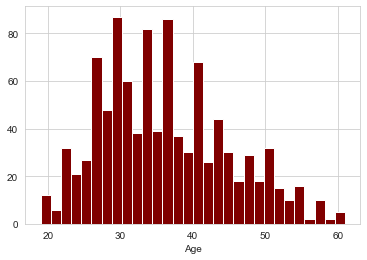

In [8]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30, color='maroon')
plt.xlabel('Age')
plt.show()

- Majority of users are from the age group of 25 - 40 years.

**Creating a bivariate plot comparing the Area Income and Age features.**

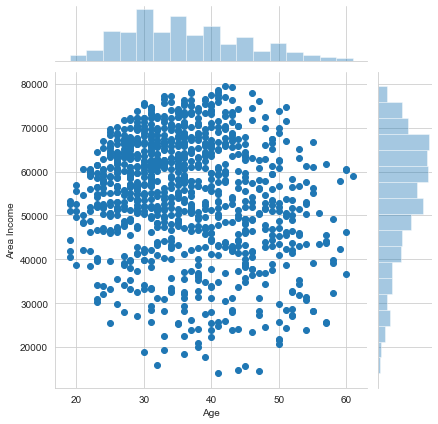

In [9]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)
plt.show()

- There is some amount of negative correlation between the Age and Area Income factors. Which means that as the age increases, the area income decreases, and vice versa.

**Creating a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

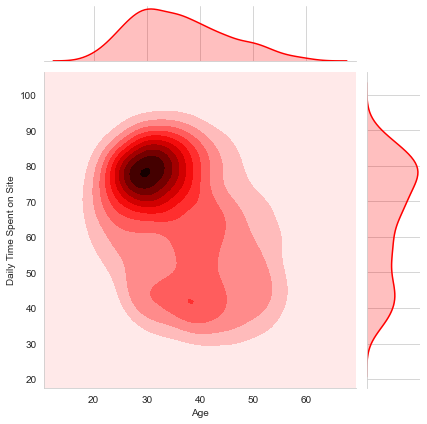

In [10]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red',kind='kde');

- There is clearly a negative correlation between Age of the users and the amount of time spent by them on the site daily. Which implies that the users of age between 20 to 40 spend more time on the site daily.

**Creating a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

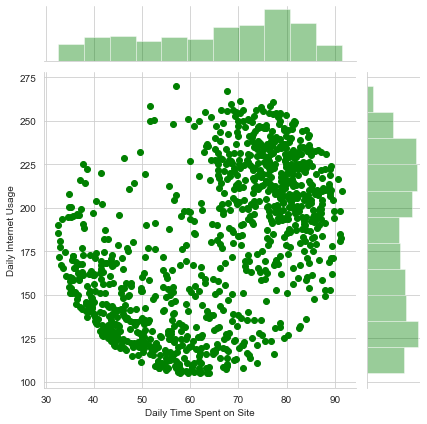

In [11]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')
plt.show()

- The daily time spent on site by the users is positively correlated to their daily internet usage.

**Checking the number of users who clicked on the ad based on their gender**

In [12]:
# Number of Male vs Female users
ad_data['Gender'].value_counts()

Female    519
Male      481
Name: Gender, dtype: int64

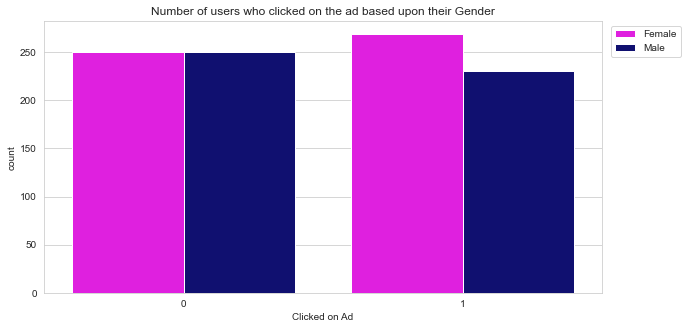

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x='Clicked on Ad', data=ad_data, hue='Gender', palette=['magenta','navy'])
plt.title('Number of users who clicked on the ad based upon their Gender')
plt.legend(bbox_to_anchor=(1.15,1,0,0))
plt.show()

**Creating a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

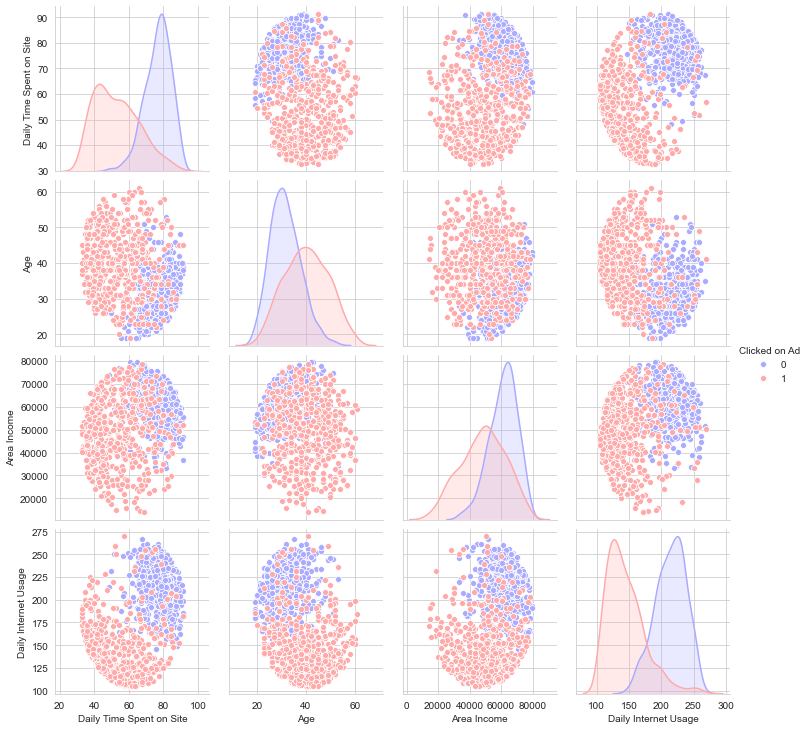

In [14]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr')
plt.show()

**Let's Check which numerical feature is highly correlated to the 'Clicked on Ad' feature**

In [15]:
pd.DataFrame(ad_data.corr()['Clicked on Ad'])

,Clicked on Ad
Daily Time Spent on Site,-0.748117
Age,0.492531
Area Income,-0.476255
Daily Internet Usage,-0.786539
Clicked on Ad,1.000000


**Working with the TimeStamp Feature**

Let's try to extract the time from the Timestamp feature and check if we can draw insights from the same.

In [16]:
# Checking the datatype of Timestamp column
print(ad_data['Timestamp'].dtype)

object


The Timestamp feature is of the type 'object'. Hence we will first convert it to pandas datetime object and then extract the time from the same into a new column.

In [17]:
# converting to datetime object
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])

In [18]:
# rechecking the datatype now
print(ad_data['Timestamp'].dtype)

datetime64[ns]


In [19]:
# extracting the Hour of the day from timestamp
ad_data['Hour'] = ad_data['Timestamp'].map(lambda x : x.hour)
ad_data['Hour']

0       0
1       1
2      20
3       2
4       3
       ..
995    21
996     2
997    17
998     2
999    21
Name: Hour, Length: 1000, dtype: int64

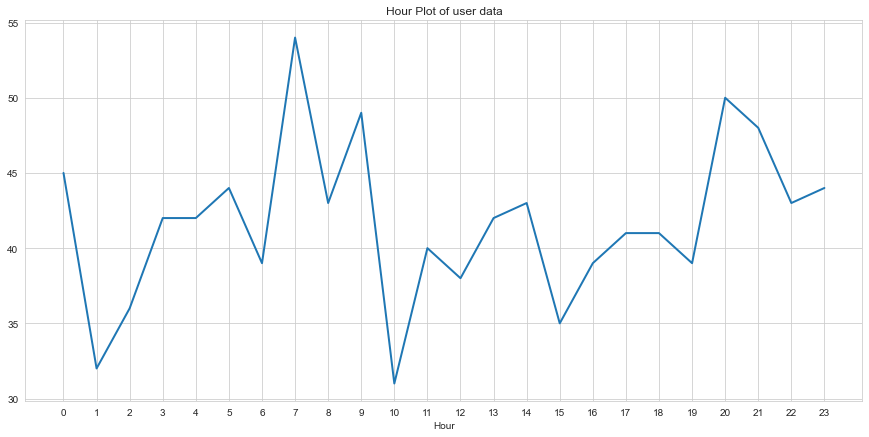

In [20]:
# plotting the hour of the day feature
plt.figure(figsize=(15,7))
ad_data.groupby('Hour').count()['Clicked on Ad'].plot(lw=2)
plt.title('Hour Plot of user data')
plt.xticks(np.arange(0,24))
plt.show()

- The users have been most active during the morning hours between 6 am to 9 am and between 8 pm to 11 pm with highest peack occuring at 7 am.
- The least active hours have been 1 am, 10 am and 5 pm, with lowest peak at 10 am.

In [21]:
# extracting the Month from timestamp
ad_data['Month'] = ad_data['Timestamp'].map(lambda x : x.month)
ad_data['Month']

0      3
1      4
2      3
3      1
4      6
      ..
995    2
996    4
997    2
998    3
999    6
Name: Month, Length: 1000, dtype: int64

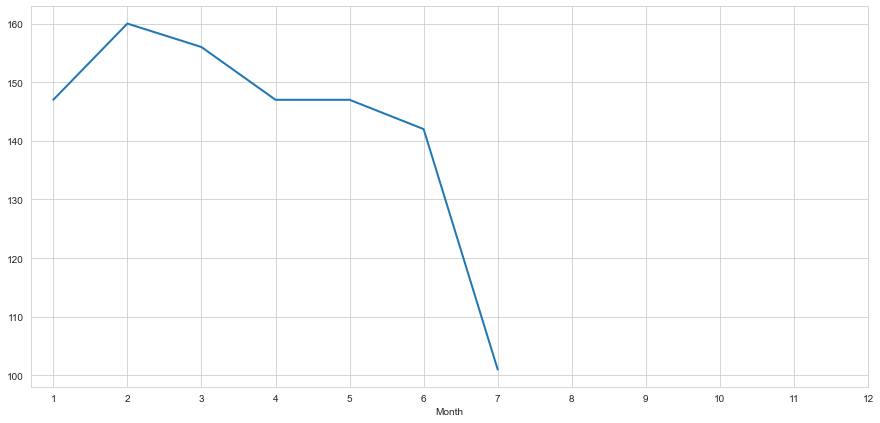

In [22]:
# plotting the Month feature
plt.figure(figsize=(15,7))
ad_data.groupby('Month').count()['Clicked on Ad'].plot(lw=2)
plt.xticks(np.arange(1,13))
plt.show()

In [23]:
ad_data['Month'].value_counts()

2    160
3    156
5    147
4    147
1    147
6    142
7    101
Name: Month, dtype: int64

The data we have contains data for only 7 months. And the counts for each of these month are almost equal, other than the 7th month. We Can't really conclude anything from this and this feature won't be useful in our analysis or model traning either. Hence, we drop it here itself.

In [24]:
del ad_data['Month']

# Logistic Regression

Let us first check if all features are of numeric type.

In [25]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Gender                    1000 non-null   object        
 3   Area Income               1000 non-null   float64       
 4   Daily Internet Usage      1000 non-null   float64       
 5   Ad Topic Line             1000 non-null   object        
 6   City                      1000 non-null   object        
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Hour                      1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 86.1+ KB


The features Gender, Ad Topic Line, City, Country are of the object type. Let us see if we can convert them into numeric type by getting dummies based upon the various categories in these features.

In [26]:
ad_data['Ad Topic Line'].nunique()

1000

In [27]:
ad_data['City'].nunique()

969

In [28]:
ad_data['Country'].nunique()

237

In [29]:
ad_data['Country'].value_counts()

France                                                 9
Czech Republic                                         9
Peru                                                   8
Afghanistan                                            8
Micronesia                                             8
                                                      ..
Cape Verde                                             1
Mozambique                                             1
Slovenia                                               1
British Indian Ocean Territory (Chagos Archipelago)    1
Bermuda                                                1
Name: Country, Length: 237, dtype: int64

Clearly the features 'Ad Topic Line' has all unique entries, so we can't categorize it nor convert the entries into numeric type. Similarly the 'City' column has 969 unique entries which is more 90% of the data. The 'Country' column has 237 unique entries, and the maximum number of occurences of any country is only 9 times. It will be difficult and not feasible to retain these features for training our Machine learning model. Hence, it will be better if we drop them.

Also, since we have extracted the hour of the day from the timestamp feature, we will drop the Timestamp since it won't add value to our model.

In [30]:
ad_data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1, inplace=True)

We now obtain dummies for the Gender column.

In [31]:
# getting dummies for the gender column
ad_data['Male'] = pd.get_dummies(ad_data['Gender'], drop_first=True)

# dropping the gender column
del ad_data['Gender']

Let's take a final look at our final dataset for model traning.

In [32]:
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,Hour,Male
0,68.95,35,61833.90,256.09,0,0,0
1,80.23,31,68441.85,193.77,0,1,1
2,69.47,26,59785.94,236.50,0,20,0
3,74.15,29,54806.18,245.89,0,2,1
4,68.37,35,73889.99,225.58,0,3,0
...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,21,1
996,51.30,45,67782.17,134.42,1,2,1
997,51.63,51,42415.72,120.37,1,17,1
998,55.55,19,41920.79,187.95,0,2,0


We have the necessary features. Now we proceed to dividing our data into input and out features and futher we split the data into traning and testing sets.

In [33]:
# X is the input attributes which contains all features o our dataset except the target feature
X = ad_data.drop('Clicked on Ad', axis=1)

# y is the target variable
y = ad_data['Clicked on Ad']

**Splitting the data into training set and testing set using train_test_split**

In [34]:
# importing the model
from sklearn.model_selection import train_test_split

# performing the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Training and fitting a logistic regression model on the training set.**

In [35]:
# importing the model
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Predictions and Evaluations
**Now we predict values for the testing data.**

In [37]:
predictions = logmodel.predict(X_test)

**Creating a classification report and confusion matrix for the model.**

In [38]:
from sklearn.metrics import classification_report

In [39]:
print('Classification Report: \n', classification_report(y_test,predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       162
           1       0.95      0.86      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [40]:
from sklearn.metrics import plot_confusion_matrix

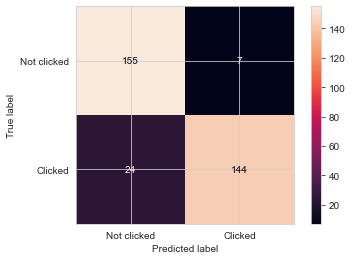

In [41]:
plot_confusion_matrix(logmodel, X_test, y_test, display_labels=['Not clicked', 'Clicked'], cmap=None)
plt.show()